In [ ]:
# Practical-10
# Statictiscal Foundation of Data Science
#Alka
#GF202345417

In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')

# Q.1) Basic statistics using describe()
print("=== 1) Basic statistics (describe) ===\n")
display(X.describe())   # in Jupyter this shows nicely; otherwise use print(X.describe())


print("\nClass counts:")
print(y.value_counts().sort_index())



=== 1) Basic statistics (describe) ===



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000



Class counts:
target
0    59
1    71
2    48
Name: count, dtype: int64


C:\Users\thaku\AppData\Local\Temp\ipykernel_10308\2625191429.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_class, labels=[f"Class {c}" for c in sorted(y.unique())])


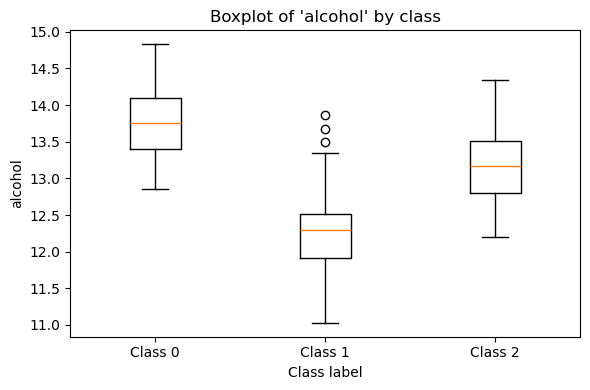

C:\Users\thaku\AppData\Local\Temp\ipykernel_10308\2625191429.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_class, labels=[f"Class {c}" for c in sorted(y.unique())])


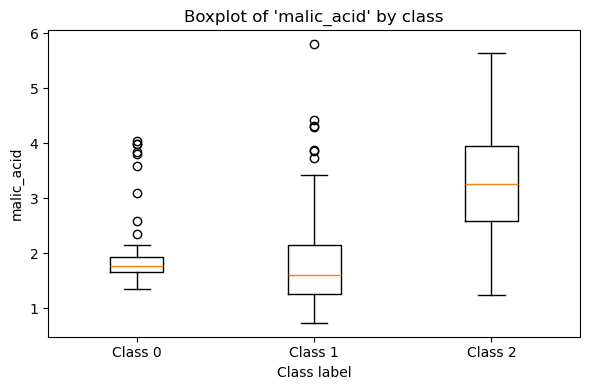

C:\Users\thaku\AppData\Local\Temp\ipykernel_10308\2625191429.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_class, labels=[f"Class {c}" for c in sorted(y.unique())])


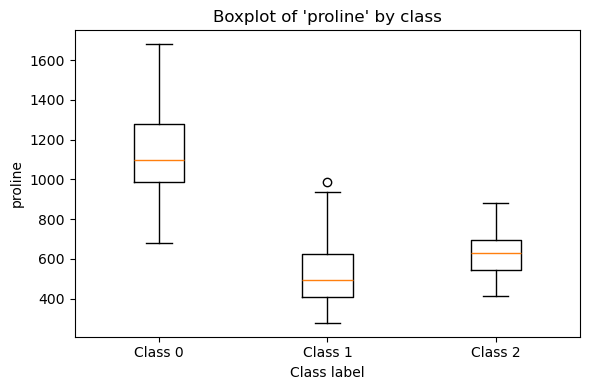

In [11]:
#Q.2) Boxplot by output labels/classes
features_for_box = ['alcohol', 'malic_acid', 'proline']

for feat in features_for_box:
    plt.figure(figsize=(6,4))
    # prepare data grouped by class
    data_by_class = [X[feat][y == cls].values for cls in sorted(y.unique())]
    plt.boxplot(data_by_class, labels=[f"Class {c}" for c in sorted(y.unique())])
    plt.title(f"Boxplot of '{feat}' by class")
    plt.xlabel("Class label")
    plt.ylabel(feat)
    plt.tight_layout()
    plt.show()

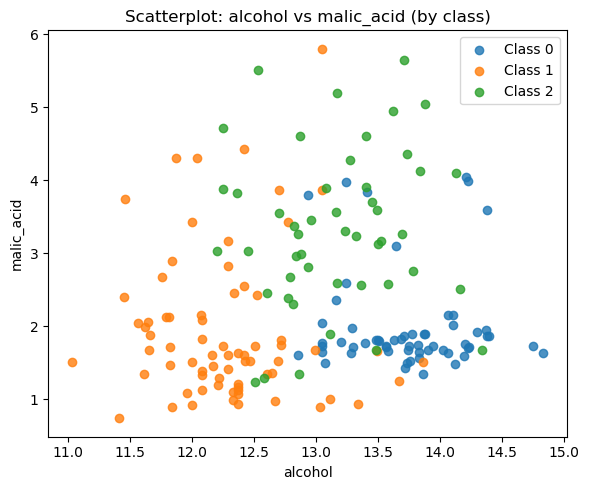

In [4]:
# Q.3) Scatterplot using two variables (alcohol vs malic_acid)
plt.figure(figsize=(6,5))
for cls in sorted(y.unique()):
    mask = (y == cls)
    plt.scatter(X.loc[mask,'alcohol'], X.loc[mask,'malic_acid'], label=f"Class {cls}", alpha=0.8)
plt.xlabel('alcohol')
plt.ylabel('malic_acid')
plt.title('Scatterplot: alcohol vs malic_acid (by class)')
plt.legend()
plt.tight_layout()
plt.show()

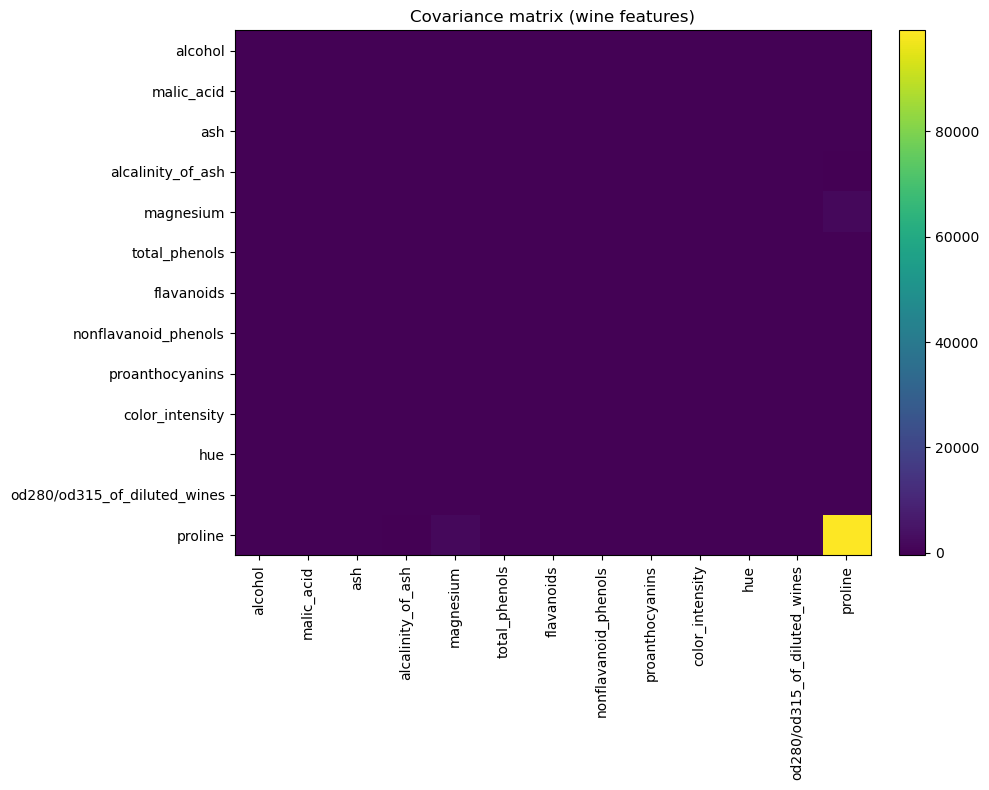


Covariance matrix (numeric):


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,0.659062,0.085611,0.047115,-0.841093,3.139878,0.146887,0.192033,-0.015754,0.063518,1.028283,-0.013313,0.041698,164.567185
malic_acid,0.085611,1.248015,0.050277,1.076332,-0.870780,-0.234338,-0.458630,0.040733,-0.141147,0.644838,-0.143326,-0.292447,-67.548867
ash,0.047115,0.050277,0.075265,0.406208,1.122937,0.022146,0.031535,0.006358,0.001516,0.164654,-0.004682,0.000762,19.319739
alcalinity_of_ash,-0.841093,1.076332,0.406208,11.152686,-3.974760,-0.671149,-1.172083,0.150422,-0.377176,0.145024,-0.209118,-0.656234,-463.355345
magnesium,3.139878,-0.870780,1.122937,-3.974760,203.989335,1.916470,2.793087,-0.455563,1.932832,6.620521,0.180851,0.669308,1769.158700
total_phenols,0.146887,-0.234338,0.022146,-0.671149,1.916470,0.391690,0.540470,-0.035045,0.219373,-0.079998,0.062039,0.311021,98.171057
flavanoids,0.192033,-0.458630,0.031535,-1.172083,2.793087,0.540470,0.997719,-0.066867,0.373148,-0.399169,0.124082,0.558262,155.447492
nonflavanoid_phenols,-0.015754,0.040733,0.006358,0.150422,-0.455563,-0.035045,-0.066867,0.015489,-0.026060,0.040121,-0.007471,-0.044469,-12.203586
proanthocyanins,0.063518,-0.141147,0.001516,-0.377176,1.932832,0.219373,0.373148,-0.026060,0.327595,-0.033504,0.038665,0.210933,59.554334
color_intensity,1.028283,0.644838,0.164654,0.145024,6.620521,-0.079998,-0.399169,0.040121,-0.033504,5.374449,-0.276506,-0.705813,230.767480


In [5]:
# Q.4) Plot Co-Variance Matrix
cov_mat = X.cov()
plt.figure(figsize=(10,8))
im = plt.imshow(cov_mat.values, aspect='auto')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(cov_mat.columns)), cov_mat.columns, rotation=90)
plt.yticks(range(len(cov_mat.index)), cov_mat.index)
plt.title("Covariance matrix (wine features)")
plt.tight_layout()
plt.show()

# If you prefer a numeric table
print("\nCovariance matrix (numeric):")
display(cov_mat)  

In [6]:
#Q.5) Data Scaling (StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\n=== 5) Scaled data statistics (describe) ===\n")
display(X_scaled_df.describe().T)  


=== 5) Scaled data statistics (describe) ===



,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,7.943708e-15,1.002821,-2.434235,-0.788245,0.061000,0.836129,2.259772
malic_acid,178.0,3.592632e-16,1.002821,-1.432983,-0.658749,-0.423112,0.669793,3.109192
ash,178.0,-4.066660e-15,1.002821,-3.679162,-0.572122,-0.023821,0.698109,3.156325
alcalinity_of_ash,178.0,-7.983626e-17,1.002821,-2.671018,-0.689137,0.001518,0.602088,3.154511
magnesium,178.0,-7.983626e-17,1.002821,-2.088255,-0.824415,-0.122282,0.509638,4.371372
total_phenols,178.0,-3.991813e-17,1.002821,-2.107246,-0.885468,0.095960,0.808997,2.539515
flavanoids,178.0,9.979533e-16,1.002821,-1.695971,-0.827539,0.106150,0.849085,3.062832
nonflavanoid_phenols,178.0,-5.588538e-16,1.002821,-1.868234,-0.740141,-0.176095,0.609541,2.402403
proanthocyanins,178.0,-1.656602e-15,1.002821,-2.069034,-0.597284,-0.062898,0.629175,3.485073
color_intensity,178.0,-3.442939e-16,1.002821,-1.634288,-0.795103,-0.159225,0.493956,3.435432


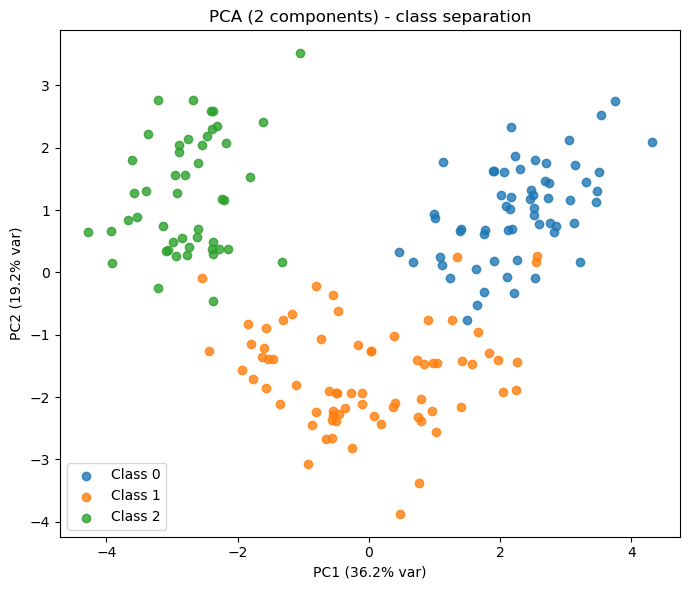

Explained variance ratio (PC1, PC2): [0.36198848 0.1920749 ]


In [7]:
# Q.6) PCA (2 components) to show class separation
pca = PCA(n_components=2)
pcs = pca.fit_transform(X_scaled_df)
pc_df = pd.DataFrame(pcs, columns=['PC1','PC2'])
pc_df['target'] = y.values

plt.figure(figsize=(7,6))
for cls in sorted(pc_df['target'].unique()):
    mask = (pc_df['target'] == cls)
    plt.scatter(pc_df.loc[mask,'PC1'], pc_df.loc[mask,'PC2'], label=f"Class {cls}", alpha=0.8)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
plt.title("PCA (2 components) - class separation")
plt.legend()
plt.tight_layout()
plt.show()

print("Explained variance ratio (PC1, PC2):", pca.explained_variance_ratio_[:2])
